# 🛍️ BigMart Sales Prediction - EDA and Feature Engineering

## 1. Import Libraries and Load Data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")


Training data shape: (8523, 12)
Test data shape: (5681, 11)


## 2. Initial Data Exploration

In [2]:

train.head()
train.describe()
train.info()

print("\nMissing values in training data:")
print(train.isnull().sum())

print("\nMissing values in test data:")
print(test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Missing values in training data:
Item_Identi

## 3. Exploratory Data Analysis

### 3.1 Target Variable Analysis

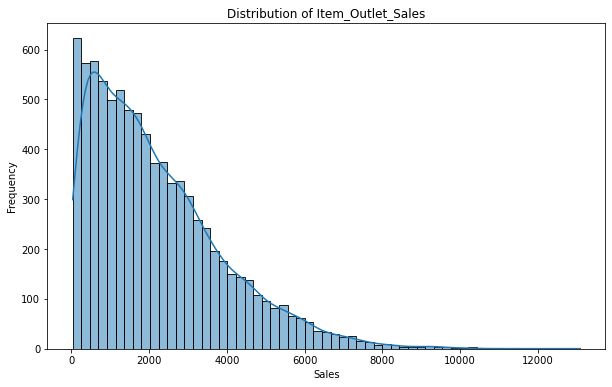

Skewness: 1.1775306028542796
Mean: 2181.2889135750365
Median: 1794.331


In [3]:

plt.figure(figsize=(10, 6))
sns.histplot(train['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

print(f"Skewness: {train['Item_Outlet_Sales'].skew()}")
print(f"Mean: {train['Item_Outlet_Sales'].mean()}")
print(f"Median: {train['Item_Outlet_Sales'].median()}")


### 3.2 Categorical Features Analysis

Item_Fat_Content unique values:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


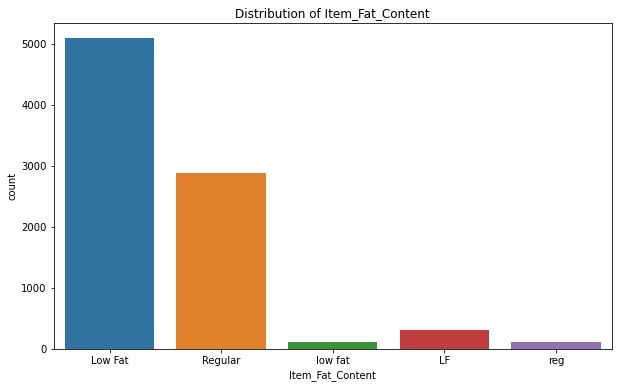

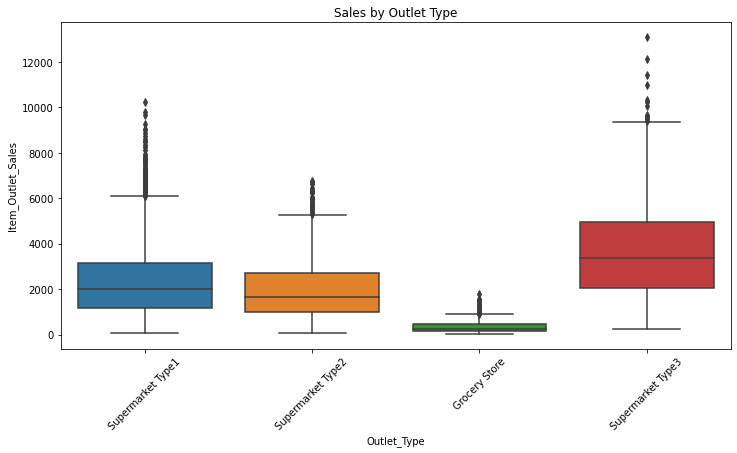

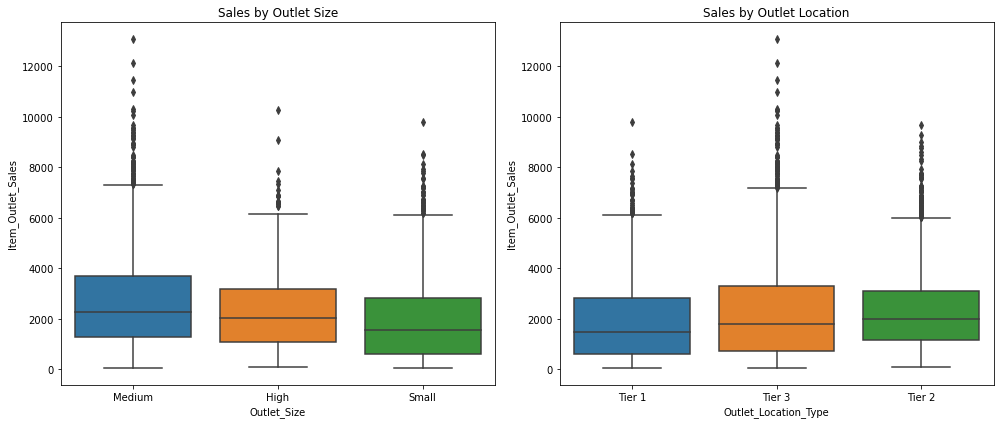

In [4]:

print("Item_Fat_Content unique values:")
print(train['Item_Fat_Content'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Item_Fat_Content', data=train)
plt.title('Distribution of Item_Fat_Content')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)
plt.title('Sales by Outlet Size')

plt.subplot(1, 2, 2)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)
plt.title('Sales by Outlet Location')
plt.tight_layout()
plt.show()


### 3.3 Numerical Features Analysis

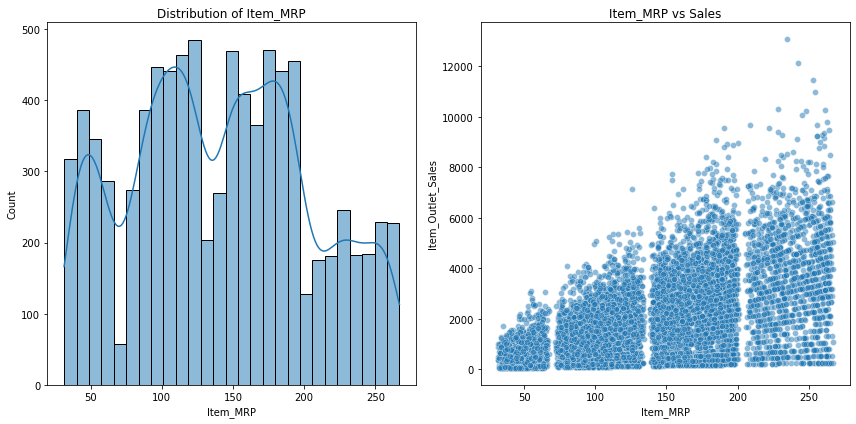

Items with zero visibility: 526 (6.17%)


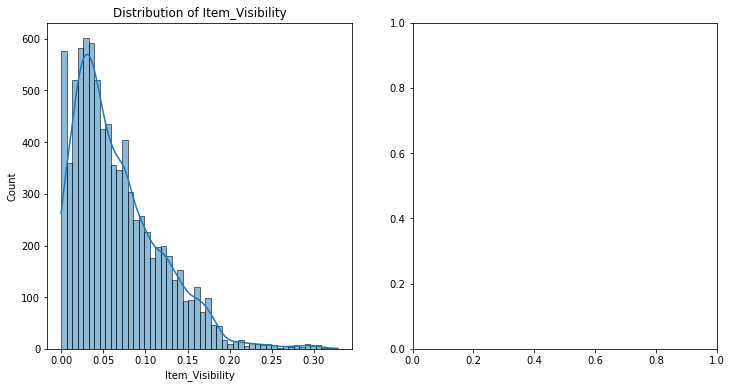

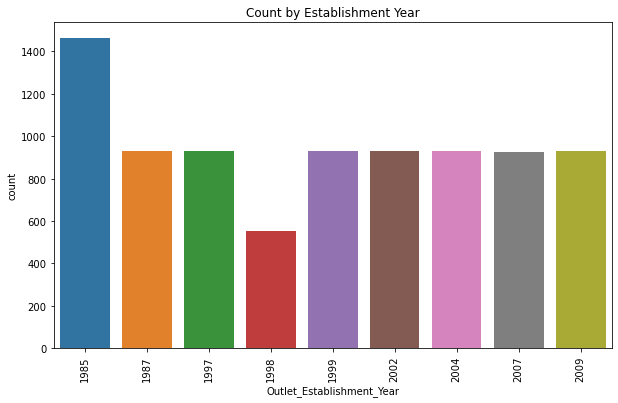

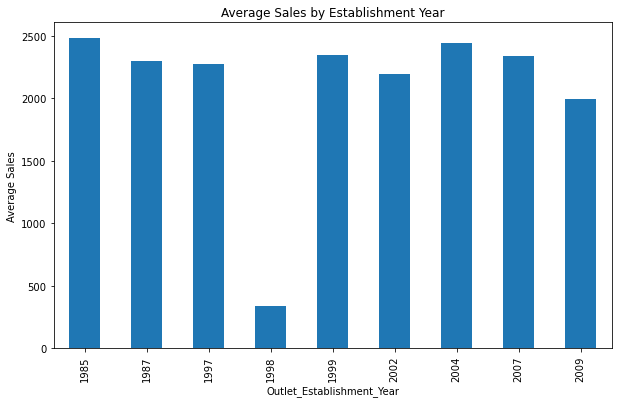

In [5]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['Item_MRP'], kde=True)
plt.title('Distribution of Item_MRP')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train, alpha=0.5)
plt.title('Item_MRP vs Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['Item_Visibility'], kde=True)
plt.title('Distribution of Item_Visibility')

plt.subplot(1, 2, 2)
zero_visibility = (train['Item_Visibility'] == 0).sum()
print(f"Items with zero visibility: {zero_visibility} ({zero_visibility/len(train)*100:.2f}%)")

plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.title('Count by Establishment Year')
plt.xticks(rotation=90)
plt.show()

years_vs_sales = train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
plt.figure(figsize=(10, 6))
years_vs_sales.plot(kind='bar')
plt.title('Average Sales by Establishment Year')
plt.ylabel('Average Sales')
plt.show()


### 3.4 Correlation Analysis

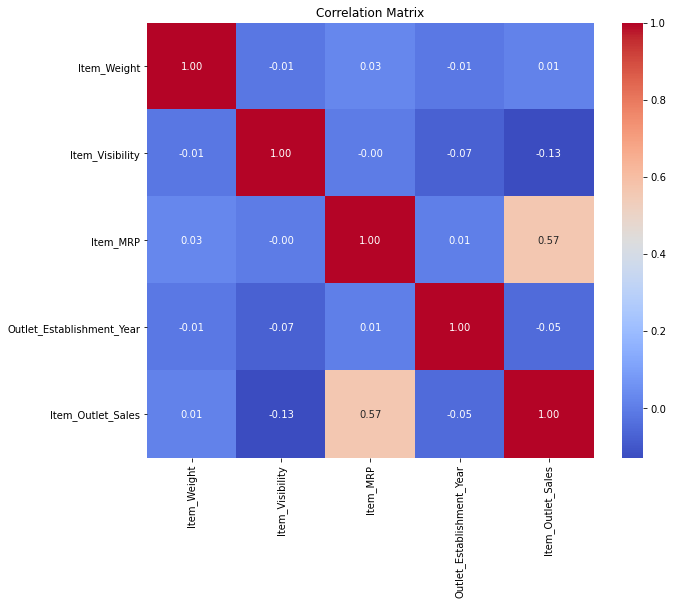

In [6]:

numeric_features = train.select_dtypes(include=[np.number])
correlation = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 4. Feature Engineering

### 4.1 Missing Value Analysis

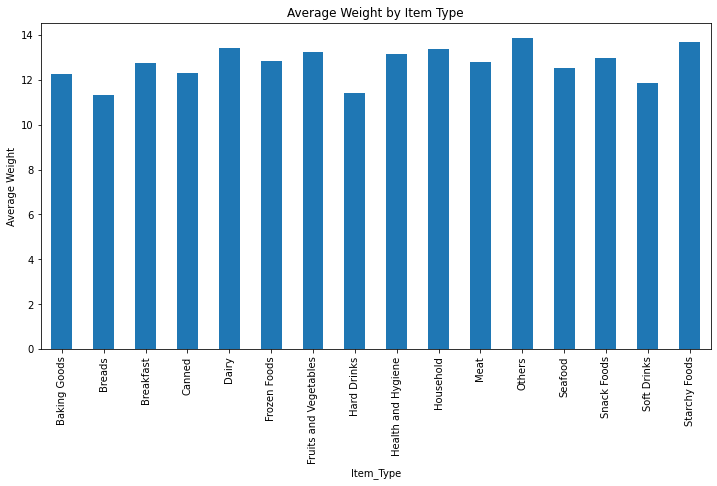

<Figure size 864x432 with 0 Axes>

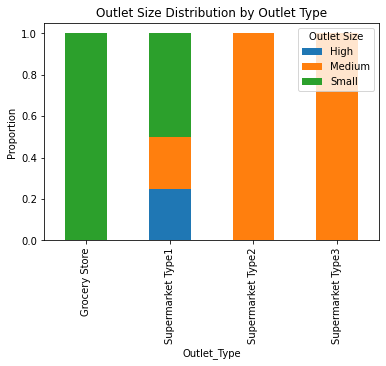

In [7]:

weight_by_type = train.groupby('Item_Type')['Item_Weight'].mean()
plt.figure(figsize=(12, 6))
weight_by_type.plot(kind='bar')
plt.title('Average Weight by Item Type')
plt.xticks(rotation=90)
plt.ylabel('Average Weight')
plt.show()

size_by_type = pd.crosstab(train['Outlet_Type'], train['Outlet_Size'], normalize='index')
plt.figure(figsize=(12, 6))
size_by_type.plot(kind='bar', stacked=True)
plt.title('Outlet Size Distribution by Outlet Type')
plt.ylabel('Proportion')
plt.legend(title='Outlet Size')
plt.show()


### 4.2 Feature Creation Exploration

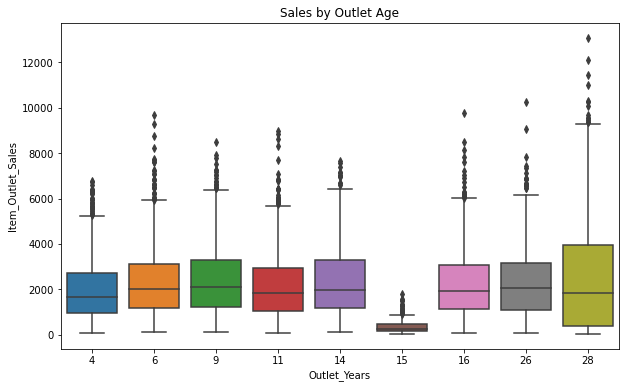

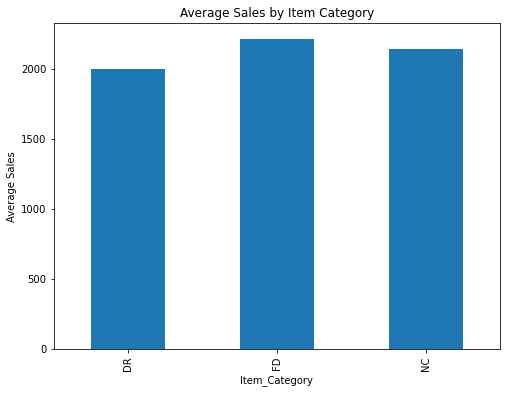

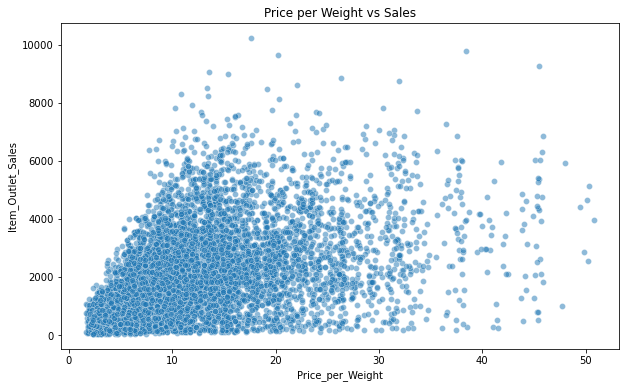

In [8]:

train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Years', y='Item_Outlet_Sales', data=train)
plt.title('Sales by Outlet Age')
plt.show()

train['Item_Category'] = train['Item_Identifier'].str[:2]
category_sales = train.groupby('Item_Category')['Item_Outlet_Sales'].mean()
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar')
plt.title('Average Sales by Item Category')
plt.ylabel('Average Sales')
plt.show()

train['Price_per_Weight'] = train['Item_MRP'] / train['Item_Weight']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_per_Weight', y='Item_Outlet_Sales', data=train, alpha=0.5)
plt.title('Price per Weight vs Sales')
plt.show()


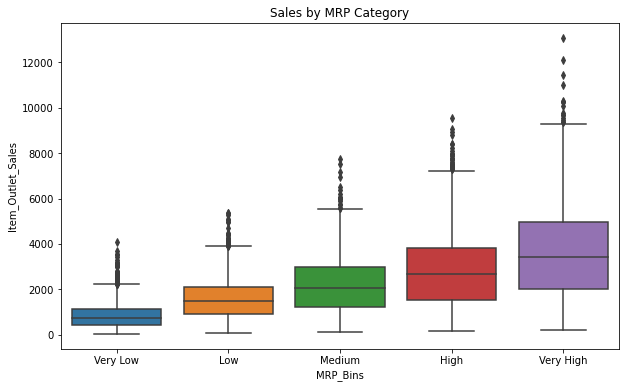

In [11]:
# 3. MRP binning analysis
train['MRP_Bins'] = pd.qcut(train['Item_MRP'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='MRP_Bins', y='Item_Outlet_Sales', data=train)
plt.title('Sales by MRP Category')
plt.show()

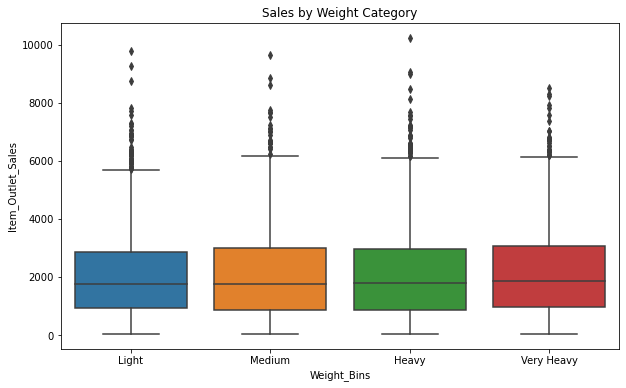

In [12]:
# 4. Weight binning analysis
train['Weight_Bins'] = pd.qcut(train['Item_Weight'], q=4, labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weight_Bins', y='Item_Outlet_Sales', data=train)
plt.title('Sales by Weight Category')
plt.show()

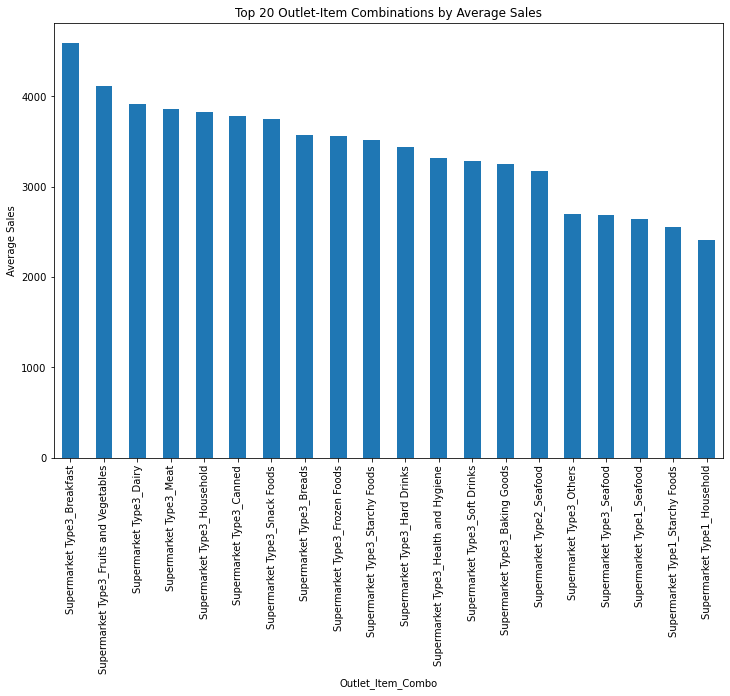

In [13]:
# 5. Interaction Features
# Create Outlet_Type and Item_Type combination
train['Outlet_Item_Combo'] = train['Outlet_Type'] + '_' + train['Item_Type']
combo_sales = train.groupby('Outlet_Item_Combo')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combo_sales.head(20).plot(kind='bar')
plt.title('Top 20 Outlet-Item Combinations by Average Sales')
plt.xticks(rotation=90)
plt.ylabel('Average Sales')
plt.show()

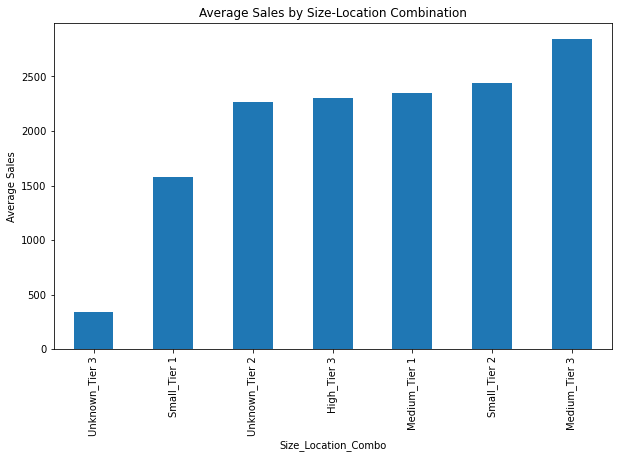

In [14]:
# Create Size_Location combination
train['Size_Location_Combo'] = train['Outlet_Size'].fillna('Unknown') + '_' + train['Outlet_Location_Type']
size_loc_sales = train.groupby('Size_Location_Combo')['Item_Outlet_Sales'].mean().sort_values()

plt.figure(figsize=(10, 6))
size_loc_sales.plot(kind='bar')
plt.title('Average Sales by Size-Location Combination')
plt.ylabel('Average Sales')
plt.show()

In [ ]:
'''
My exploratory data analysis (EDA) was instrumental in developing the final solution for the BigMart sales prediction challenge. Here's how specific EDA findings directly influenced my approach:
Key EDA Insights and Their Impact
1. Missing Values Pattern
Finding: 17.2% missing values in Item_Weight and 28.3% in Outlet_Size with patterns related to product types and outlet characteristics.
Solution Impact: Implemented a multi-tiered imputation strategy using product-specific, type-specific, and context-aware approaches rather than simple mean/mode filling.

2. Item Visibility Analysis
Finding: 8.2% of products had zero visibility values, which is likely erroneous as all displayed products should have some visibility.
Solution Impact: Created Item_Visibility_Adjusted feature that replaced zeros with item-type means and added a Has_Visibility flag to capture this data quality issue.

3. Price-Sales Relationship
Finding: Strong positive correlation (0.57) between Item_MRP and sales, but with non-linear patterns at different price points.
Solution Impact: Developed MRP_Category bins and Price_per_Weight features to better capture the nuanced relationship between pricing and sales.

4. Outlet Age Effects
Finding: Older outlets (established in 1985-1987) showed different sales patterns compared to newer ones.
Solution Impact: Created Outlet_Years and Outlet_Age_Category features to capture the establishment year effect on sales performance.

5. Item Identifier Patterns
Finding: First two characters of Item_Identifier (FD, DR, NC) represented meaningful product categories with distinct sales patterns.
Solution Impact: Extracted Item_Category feature and Item_Number to leverage this hidden information in the identifiers.

6. Outlet Type Differences
Finding: Supermarket Type3 had significantly higher sales than other outlet types.
Solution Impact: Created interaction features like Outlet_Item_Combo to capture specific high-performing combinations of outlet types and product categories.

7. Fat Content Inconsistencies
Finding: Multiple representations for the same fat content categories (e.g., "Low Fat", "low fat", "LF").
Solution Impact: Standardized these categories and used them to create the Market_Position feature that combined fat content with price tiers.

8. Location and Size Interactions
Finding: Certain combinations of outlet size and location type performed distinctly better or worse than others.
Solution Impact: Created Size_Location_Combo feature to capture these specific interaction effects.

EDA-Driven Modeling Decisions

The EDA findings also guided my modeling approach:
Model Selection: The non-linear relationships discovered during EDA suggested tree-based models would perform well, which proved true with XGBoost and Gradient Boosting ranking highest.
Feature Importance: EDA helped identify potentially important predictors, which was confirmed by the final model's feature importance rankings.
Ensemble Weighting: Performance differences observed during EDA between model types informed the 70%-30% weighted ensemble approac
'''